# Tweet Oriented Dataset - EDA (2nd Pass)
- UDD/MDS18/PP4
- Final Project: 'Studying Twitter User Accounts: Spotting Suspicious Social Bot Behavior'
- Master Candidate: Marcelo Rovai
- Professors:	   
    - Eduardo Graells-Garrido (Supervisor)
    - Loreto Bravo
    - Leo Ferres

## Main Libraries

In [235]:
import pandas as pd
from pandas.plotting import table
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from wordcloud import WordCloud
from stop_words import get_stop_words

In [72]:
pd.set_option('display.float_format', lambda x: '%.f' % x)
sns.set_context("paper", rc={"font.size":12,"axes.titlesize":12,"axes.labelsize":12})
sns.set("paper", style='white',font_scale=1.5)
STOPWORDS = get_stop_words('spanish')

## Main Functions

In [210]:
def print_tweets_summary(tweets, prt=False, save_file_name=None):
    len_tweets = len(tweets)
    hash_tweets = tweets[tweets['num_hashtags'] != 0]
    ment_tweets = tweets[tweets['num_mentions'] != 0]
    url_tweets = tweets[tweets['num_urls'] != 0]
    plain_txt_tweets = tweets[(tweets['num_mentions'] == 0)
                              & (tweets['RT'] == False)]
    RT_tweets = tweets[tweets['RT'] == True]
    reply_tweets = tweets[tweets['Reply'].apply(type) == str]
    mention_tweets = tweets[(tweets['RT'] == False)
                            & (tweets['text'].str.contains("@"))]
    print("\n[SUMMARY]\n")
    print("There are {:,} tweets from {:,} different users".format(len_tweets, tweets['user'].nunique()))
    print("Number of tweets per user:",
          round(len_tweets / tweets['user'].nunique(), 1))
    print("")
    print(
        f"The percentage of tweets with hashtags is {round(len(hash_tweets)/len_tweets*100)}% of all the tweets"
    )
    print(
        f"The percentage of tweets with mentions is {round(len(ment_tweets)/len_tweets*100)}% of all the tweets"
    )
    print(
        f"The percentage of tweets with Urls is {round(len(url_tweets)/len_tweets*100)}% of all the tweets"
    )
    print(
        f"The percentage of tweets with plain text is {round(len(plain_txt_tweets)/len_tweets*100)}% of all the tweets"
    )
    print(
        f"The percentage of retweets is {round(len(RT_tweets)/len_tweets*100)}% of all the tweets"
    )
    print(
        f"The percentage of replies is {round(len(reply_tweets)/len_tweets*100)}% of all the tweets"
    )
    print(
        f"The percentage of tweets that have mentions and are not retweets is {round(len(mention_tweets)/len_tweets*100)}% of all the tweets"
    )
    
    len_list = [ len(tweets), len(RT_tweets),len(mention_tweets), len(reply_tweets), len(plain_txt_tweets)]
    item_list = ['All Tweets','Retweets', 'Mentions (No RT)', 'Replies', 'Plain text tweets']
    plt.figure(figsize=(15,8))
    plt.title('Tweet categories', fontsize = 20)
    plt.xlabel('\nType of tweet',fontsize=15)
    plt.ylabel('Number of tweets',fontsize=15)
    sns.despine(left=True)
    sns.barplot(x = item_list, y = len_list,  edgecolor = 'black', linewidth=1);
    
    if prt == True:
        plt.savefig("../images/"+save_file_name, bbox_inches='tight')

In [161]:
def get_hashtag_dict(tweets):
    hashtag_pattern = re.compile(r"#[a-zA-Z]+")
    hashtag_matches = list(tweets['text'].apply(hashtag_pattern.findall))
    hashtag_dict = {}
    for match in hashtag_matches:
        for singlematch in match:
            if singlematch not in hashtag_dict.keys():
                hashtag_dict[singlematch] = 1
            else:
                hashtag_dict[singlematch] = hashtag_dict[singlematch]+1

    hashtag_ordered_dict =sorted(hashtag_dict.items(), key=lambda x:x[1])
    hashtag_ordered_dict = hashtag_ordered_dict[::-1]
    return hashtag_ordered_dict

In [162]:
def get_mentions_dict(tweets):
    mention_pattern = re.compile(r"@[a-zA-Z_]+")
    mention_matches = list(tweets['text'].apply(mention_pattern.findall))
    mentions_dict = {}
    for match in mention_matches:
        for singlematch in match:
            if singlematch not in mentions_dict.keys():
                mentions_dict[singlematch] = 1
            else:
                mentions_dict[singlematch] = mentions_dict[singlematch]+1
    mentions_ordered_list =sorted(mentions_dict.items(), key=lambda x:x[1])
    mentions_ordered_list = mentions_ordered_list[::-1]
    return mentions_ordered_list

In [175]:
def get_devices_dict(tweets):
    devices = tweets.groupby('device')
    devicecount = devices['text'].count()

    device_dict = devicecount.to_dict()
    device_ordered_dict =sorted(device_dict.items(), key=lambda x:x[1])
    device_ordered_dict = device_ordered_dict[::-1]
    return device_ordered_dict

In [222]:
def word_cloud(wd_list, title = 'Word Cloud', d=30, prt=False, save_file_name=None):
    stopwords = set(STOPWORDS)
    all_words = ' '.join([text for text in wd_list])
    wordcloud = WordCloud(
        stopwords=stopwords,
        background_color='white',
        colormap='inferno',
        width=1600,
        height=800,
        random_state=21,
        max_words=d,
        max_font_size=200).generate(all_words)

    plt.figure(figsize=(12, 10))
    plt.title(title+'\n', fontsize=20)
    plt.axis('off')
    plt.imshow(wordcloud, interpolation="bilinear");
    
    if prt == True:
        plt.savefig("../images/"+save_file_name, bbox_inches='tight')

In [208]:
def plot_ordered_values(ordered_dict, title="Most Used", d=10, prt=False, save_file_name=None ):
    df = pd.DataFrame(ordered_dict, columns=['key', 'value'])
    data = df[0:d]
    f, ax = plt.subplots(figsize=(15, 10))
    
    sns.barplot(x="value", y="key", data=data, color="b")
    sns.despine(left=True, bottom=True)
    ax.set_xlabel("\nNº of appereances", fontsize = 15)
    ax.set_ylabel("")
    ax.set_title(title+'\n', fontsize = 20)
    
    if prt == True:
        plt.savefig("../images/"+save_file_name, bbox_inches='tight')
    
    return df.key, df.value

In [247]:
def plot_feature(df, feat, prt=False, save_file_name=None):
    f, axes = plt.subplots(ncols=1, figsize=(10, 4))
    sns.despine(left=True)
    sns.distplot(df[feat],
                 color="m",
                 hist=False,
                 kde=True,
                 kde_kws={
                     'shade': True,
                     'linewidth': 3
                 })
    plt.suptitle(feat + " distribution", fontsize=20)
    plt.xlabel(feat,fontsize=15)
    plt.setp(axes, yticks=[])

    if prt == True:
        plt.savefig("../images/"+save_file_name, bbox_inches='tight')

In [217]:
def plot_tweets_by_timeline(tweets, title=None, prt=False, save_file_name=None):
    days = tweets.groupby('day')
    daycount = days['text'].count()
    timedict = daycount.to_dict()

    fig = plt.figure(figsize = (15,15))
    #plt.plot(list(timedict.keys()), list(timedict.values()))
    plt.xlabel('\nDay of the month', fontsize = 15)
    plt.ylabel('Nº of Tweets', fontsize=15)
    plt.xticks(list(timedict.keys()), fontsize=15, rotation=90)
    sns.despine(left=True)
    sns.barplot(x = list(timedict.keys()), y = list(timedict.values()),  color = 'b', linewidth=1);
    plt.title(title, fontsize = 20);
    if prt == True:
        plt.savefig("../images/"+save_file_name, bbox_inches='tight')

## Get Datasets

In [6]:
ls ../data/

20_tweets_nov_2017.csv          45_user_adit_clean_metrics.csv
30_tweets_nov_2017_final.csv    50_user_metrics_final.csv
40_user_metrics.csv


In [7]:
tweets = pd.read_csv("../data/30_tweets_nov_2017_final.csv", lineterminator='\n')
tweets.shape

(1601643, 36)

### Cleaning

In [8]:
del tweets['Unnamed: 0']

tweets.description.fillna('', inplace=True)
tweets.location.fillna('', inplace=True)

tweets['created_at'] = pd.to_datetime(tweets['created_at'], infer_datetime_format = "%d/%m/%Y", utc  = False)
tweets['acc_creation'] = pd.to_datetime(tweets['acc_creation'], infer_datetime_format = "%d/%m/%Y", utc  = False)

tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1601643 entries, 0 to 1601642
Data columns (total 35 columns):
user_id               1601643 non-null int64
user                  1601643 non-null object
name                  1601576 non-null object
description           1601643 non-null object
verified              1601643 non-null bool
protected             1601643 non-null bool
location              1601643 non-null object
lang                  1601643 non-null object
followers             1601643 non-null int64
following             1601643 non-null int64
favourites            1601643 non-null int64
lists                 1601643 non-null int64
tweets_cnt            1601643 non-null int64
acc_creation          1601643 non-null datetime64[ns, UTC]
default_profile       1601643 non-null bool
default_prof_image    1601643 non-null bool
image                 1601643 non-null object
text                  1601643 non-null object
tweet_id              1601643 non-null int64
created_at     

In [227]:
tweets.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,1601643,129933315516692000,305137586340979456,8709,99316325,273646916,2474255359,936370454410997760
followers,1601643,124938,472966,0,292,1623,11466,2889231
following,1601643,15217,76772,0,342,1091,3448,761106
favourites,1601643,11644,29738,0,399,2203,9316,897789
lists,1601643,423,1539,0,2,13,72,10641
tweets_cnt,1601643,62870,132105,1,3350,14351,56741,1397706
tweet_id,1601643,931968928924734464,3038930338963698,925151213645189120,929816525246257152,932637635134328832,934245193888468992,936384344159080448
lenght,1601643,164,85,13,127,139,189,1017
retweet_cnt,1601643,86,299,0,0,0,30,4629
favorite_cnt,1601643,102,395,0,0,0,29,6618


In [228]:
tweets.columns

Index(['user_id', 'user', 'name', 'description', 'verified', 'protected',
       'location', 'lang', 'followers', 'following', 'favourites', 'lists',
       'tweets_cnt', 'acc_creation', 'default_profile', 'default_prof_image',
       'image', 'text', 'tweet_id', 'created_at', 'lenght', 'retweet_cnt',
       'favorite_cnt', 'reply_to_twt_id', 'reply_to_user', 'reply_to_user_id',
       'device', 'RT', 'Reply', 'retweet_from', 'num_hashtags', 'num_mentions',
       'num_urls', 'clean_text', 'day'],
      dtype='object')

In [231]:
select_tweet_feat = tweets[['followers', 'following', 'favourites', 'lists',
       'tweets_cnt', 'lenght', 'retweet_cnt',
       'favorite_cnt', 'num_hashtags', 'num_mentions',
       'num_urls']]

In [232]:
select_tweet_feat.describe().T

,count,mean,std,min,25%,50%,75%,max
followers,1601643,124938,472966,0,292,1623,11466,2889231
following,1601643,15217,76772,0,342,1091,3448,761106
favourites,1601643,11644,29738,0,399,2203,9316,897789
lists,1601643,423,1539,0,2,13,72,10641
tweets_cnt,1601643,62870,132105,1,3350,14351,56741,1397706
lenght,1601643,164,85,13,127,139,189,1017
retweet_cnt,1601643,86,299,0,0,0,30,4629
favorite_cnt,1601643,102,395,0,0,0,29,6618
num_hashtags,1601643,0,1,0,0,0,1,28
num_mentions,1601643,2,5,0,0,1,2,54


In [233]:
select_tweet_feat.describe().T.to_csv("../data/select_tweet_feat_description.csv")

In [249]:
def print_save_table(data, prt=False, save_file_name=None):
        desc = data.describe()

        #create a subplot without frame
        plot = plt.subplot(111, frame_on=False)

        #remove axis
        plot.xaxis.set_visible(False) 
        plot.yaxis.set_visible(False) 

        #create the table plot and position it in the upper left corner
        table(plot, desc, loc='upper right');

        #save the plot as a png file
        if prt == True:
            plt.savefig("../images/"+save_file_name, bbox_inches='tight')

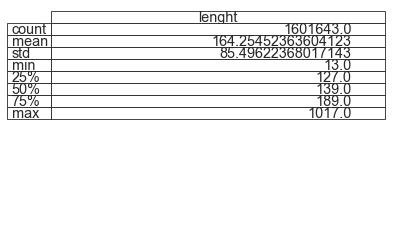

In [251]:
print_save_table(tweets.lenght, prt=False, save_file_name=None)

In [9]:
tweets.lenght.value_counts(bins=4)

(11.995000000000001, 264.0]    1436608
(264.0, 515.0]                  149627
(515.0, 766.0]                    8343
(766.0, 1017.0]                   7065
Name: lenght, dtype: int64

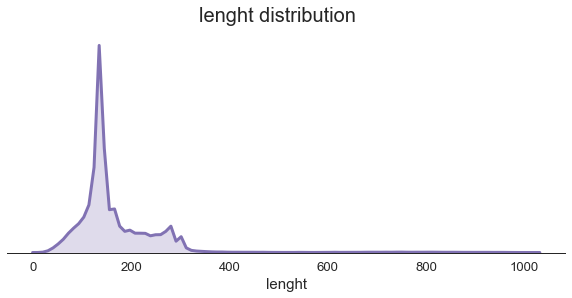

In [215]:
plot_feature(tweets, 'lenght', prt=True, save_file_name='tweets_lenght_distr');

In [246]:
tweets.followers.describe()

count   1601643
mean     124938
std      472966
min           0
25%         292
50%        1623
75%       11466
max     2889231
Name: followers, dtype: float64

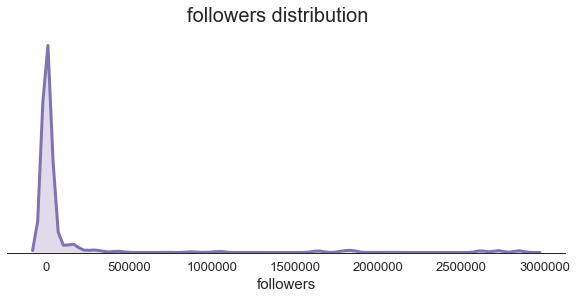

In [252]:
plot_feature(tweets, 'followers', prt=False, save_file_name='tweets_followers_distr');

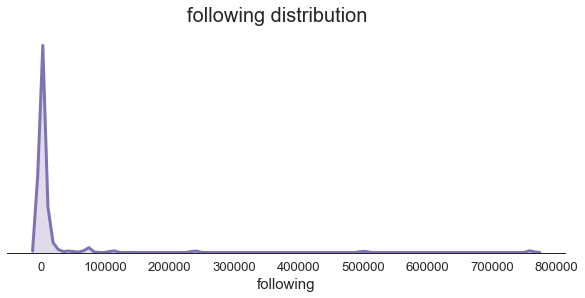

In [253]:
plot_feature(tweets, 'following', prt=False, save_file_name='tweets_following_distr');

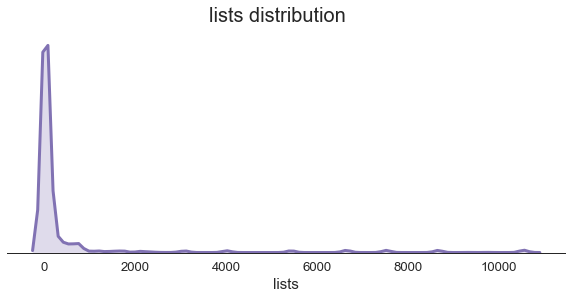

In [254]:
plot_feature(tweets, 'lists', prt=False, save_file_name='tweets_lists_distr');

In [11]:
print("There are {:,} different users".format(tweets['user'].nunique()))

There are 91,446 different users



[SUMMARY]

There are 1,601,643 tweets from 91,446 different users
Number of tweets per user: 17.5

The percentage of tweets with hashtags is 28% of all the tweets
The percentage of tweets with mentions is 74% of all the tweets
The percentage of tweets with Urls is 37% of all the tweets
The percentage of tweets with plain text is 26% of all the tweets
The percentage of retweets is 31% of all the tweets
The percentage of replies is 20% of all the tweets
The percentage of tweets that have mentions and are not retweets is 44% of all the tweets


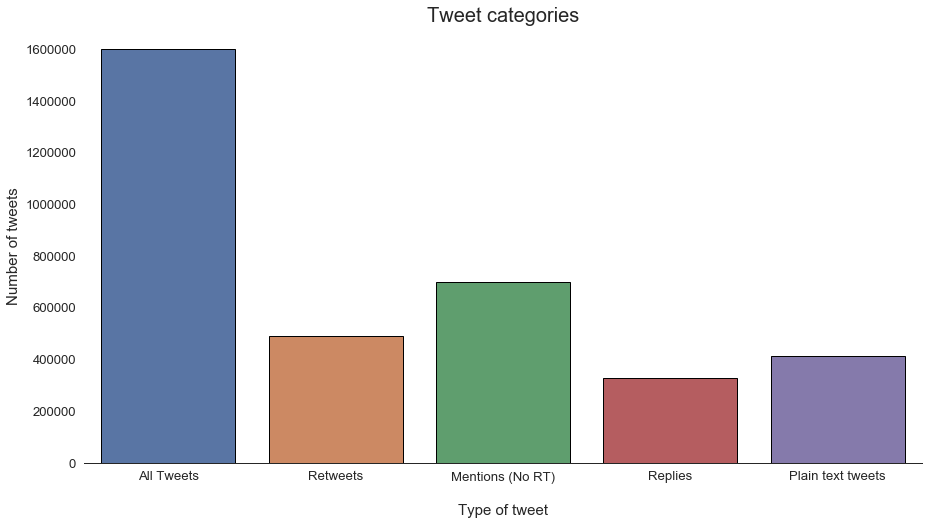

In [211]:
print_tweets_summary(tweets, prt=True, save_file_name='tweets_summary_categories')

In [165]:
hashtag_ordered_dict = get_hashtag_dict(tweets)

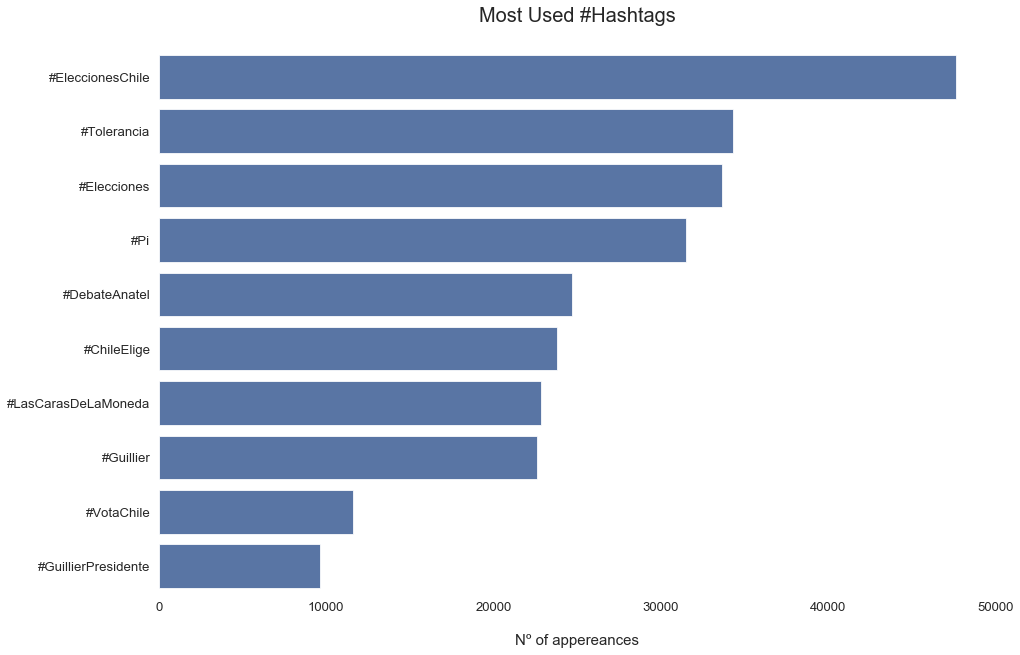

In [209]:
hash_key, hash_value = plot_ordered_values(hashtag_ordered_dict,
                                           title="Most Used #Hashtags",
                                           prt=True,
                                           save_file_name='most_used_hashtags')

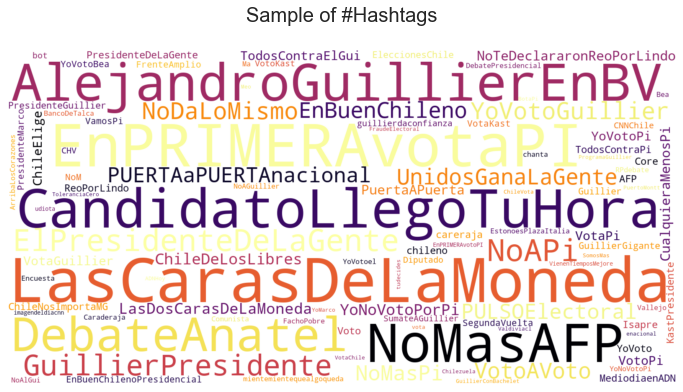

In [223]:
word_cloud(hash_key, 'Sample of #Hashtags', 100)

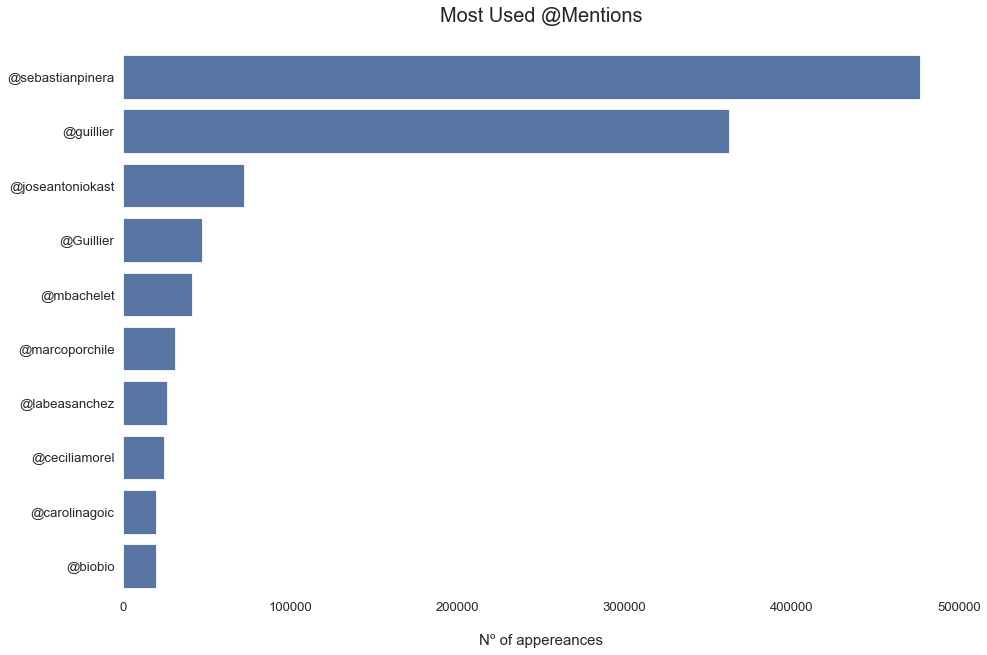

In [220]:
mentions_ordered_dict = get_mentions_dict(tweets)
ment_key, ment_value = plot_ordered_values(mentions_ordered_dict,
                                           title="Most Used @Mentions",
                                           prt=True,
                                           save_file_name='most_used_mentions')

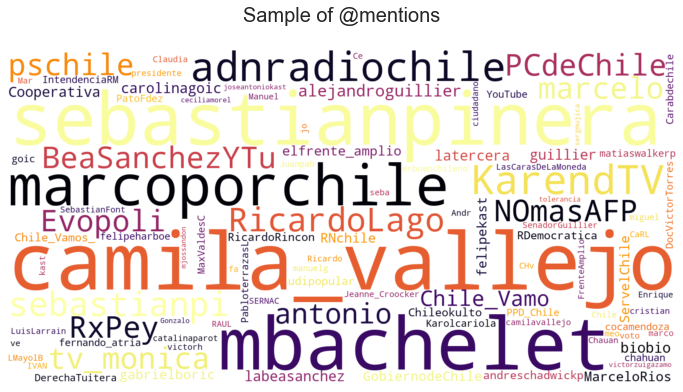

In [224]:
word_cloud(ment_key, 'Sample of @mentions', 100)

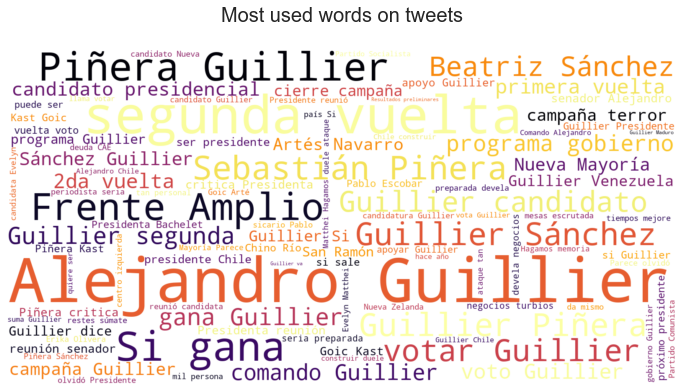

In [226]:
word_cloud(tweets.clean_text,
           'Most used words on tweets',
           100,
           prt=True,
           save_file_name='tweets_wordcloud')

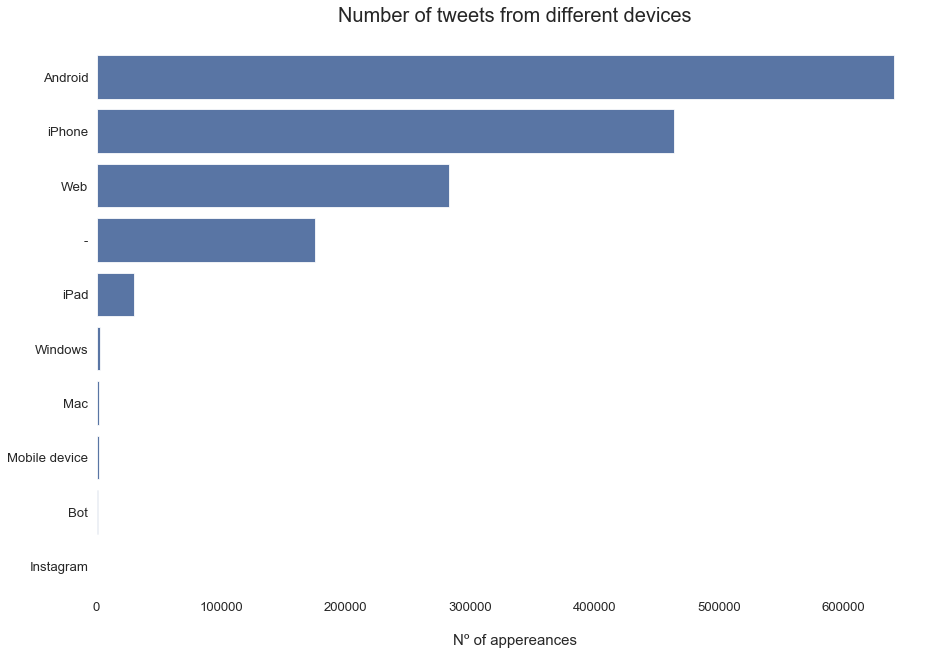

In [221]:
devices_ordered_dict = get_devices_dict(tweets)
dev_key, dev_value = plot_ordered_values(
    devices_ordered_dict,
    title="Number of tweets from different devices",
    prt=True,
    save_file_name='tweets_per_devices')

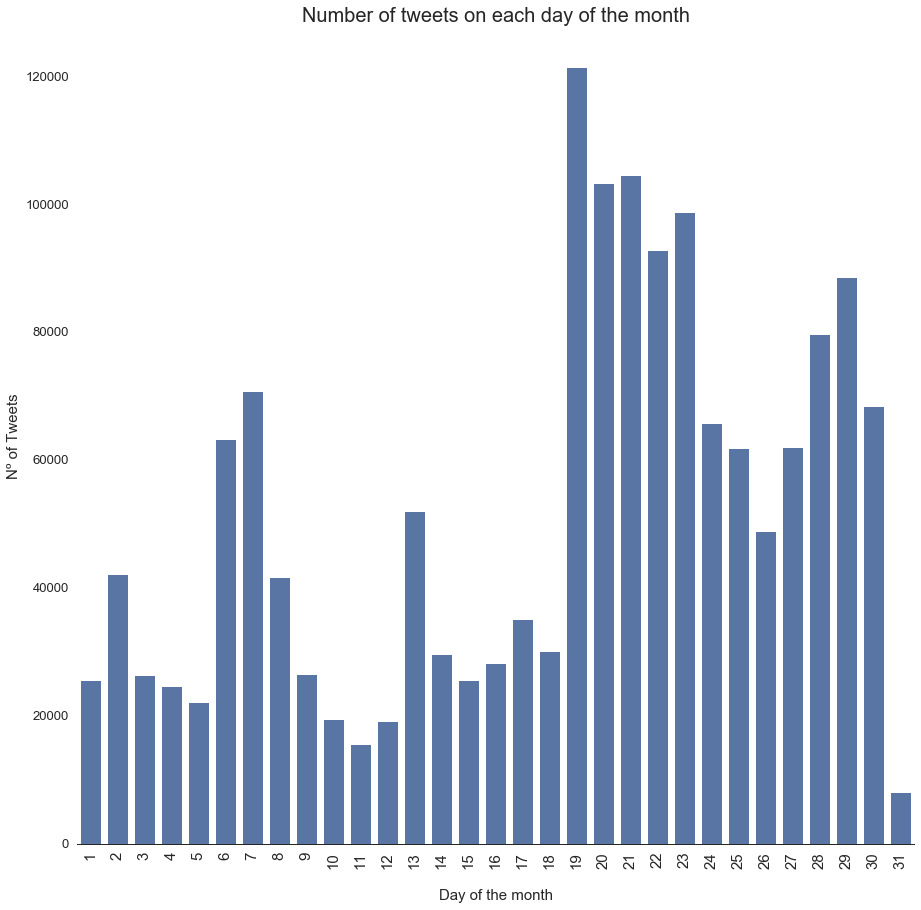

In [219]:
plot_tweets_by_timeline(tweets,
                        title='Number of tweets on each day of the month',
                        prt=True,
                        save_file_name='tweets_per_day')